# scikit-learn-linear-reg

* Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set()

# Linear Regression

Linear Regression is a supervised learning algorithm that models the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variable) denoted X.

## Generate some data:

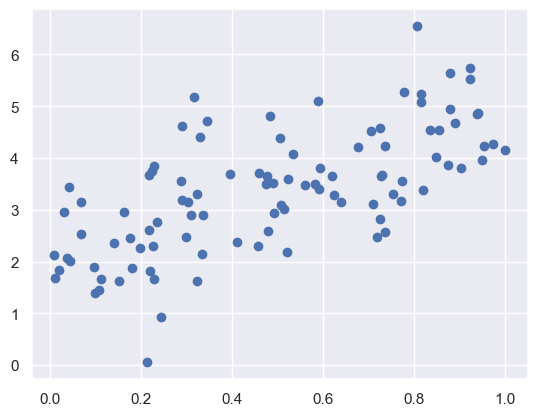

In [22]:
# Create some simple data
import numpy as np

X = np.random.random(size=(100, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(100)

plt.plot(X.squeeze(), y, 'o');

## Fit the model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)  # Fit model on training data

LinearRegression()

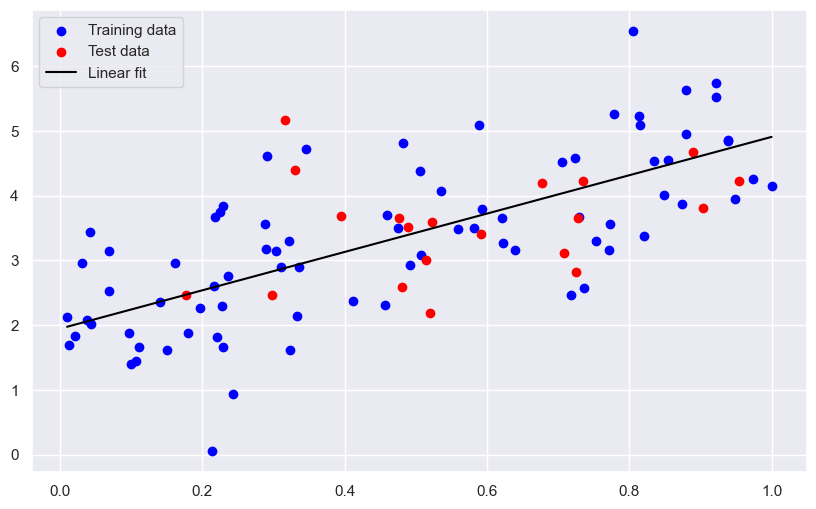

In [25]:
# Generate a range of values for plotting the prediction line
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_fit.squeeze(), y_fit, color='black', label='Linear fit')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 0.72
R2 Score: -0.17


## Evaluating Accuracy

#### Mean Squared Error (MSE):
is a measure of the average squared difference between the predicted values and the actual observed values. It gives an indication of the magnitude of error made by the model.
A MSE of 0.72 suggests that, on average, the squared difference between the model's predictions and the actual values is 0.72. This number by itself might not mean much without context, such as the range or scale of the target variable (y). If the target values range from 0 to 1, an MSE of 0.72 is quite high, indicating poor model performance. However, if the target values are in the hundreds or thousands, an MSE of 0.72 could be considered low, indicating a more accurate model.
#### R^2 Score: 
The R^2 Score, or the coefficient of determination, provides an indication of how much of the variance in the dependent variable is explained by the model. It is a normalized measure that can range from -∞ to 1.

An R^2 Score of 1 indicates that the model perfectly predicts the target variable, 0 indicates that the model performs as well as the mean of the observed data, and negative values (like -0.17 in your case) suggest that the model performs worse than a simple model that would predict the mean of the observed values for all predictions.

An R^2 Score of -0.17 is particularly concerning because it indicates that your model is not capturing the underlying trend of the data adequately and is providing less predictive power than simply using the mean of the data as a predictor. This could be a sign of several issues such as:

- The model is not suitable for the data. Linear assumptions may not hold.
- There could be outliers or high leverage points that are affecting the model performance.
- Important variables or interactions might be missing.
- There could be a non-linear relationship that a linear model cannot capture.